In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
df=pd.read_csv('cancer patient data sets.csv')

In [5]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [6]:
df=df[['Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level']]

In [7]:
df=df.replace({'Level':{'Low': 1, 'Medium': 2, 'High': 3}})

In [8]:
import seaborn as sns
sns.set()

In [9]:
df=df[['Age','Coughing of Blood','Dust Allergy','Passive Smoker','OccuPational Hazards','Air Pollution','chronic Lung Disease','Shortness of Breath','Dry Cough','Snoring','Swallowing Difficulty','Level']]

In [10]:
X=df.drop('Level',axis=1)

y=df['Level']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)


In [12]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression(solver='liblinear')
Classifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [13]:
y_test_hat = Classifier.predict(X_test)

In [14]:
Results = pd.DataFrame({'Actual':y_test,'Predictions':y_test_hat})
Results.head(10)

,Actual,Predictions
507,2,2
818,1,1
452,2,1
368,1,1
242,3,3
929,1,1
262,1,1
810,1,2
318,3,3
49,1,1


In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_hat))

0.9033333333333333


In [16]:
y_train_hat = Classifier.predict(X_train)

print(accuracy_score(y_train,y_train_hat))

0.9257142857142857


In [17]:
y_test_hat_proba = Classifier.predict_proba(X_test)

print(y_test_hat_proba.shape)

(300, 3)


In [18]:

pls = y_test_hat_proba[:,1]

Results = pd.DataFrame({'Actual':y_test,'Predictions':y_test_hat,'Prob(Class = 3)':pls})

Results.head(5)

,Actual,Predictions,Prob(Class = 3)
507,2,2,0.806446
818,1,1,0.066676
452,2,1,0.023600
368,1,1,0.000991
242,3,3,0.161223


In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_test_hat)

print(cm)

[[ 71  18   0]
 [  7  85   4]
 [  0   0 115]]


Text(66.5, 0.5, 'True Label')

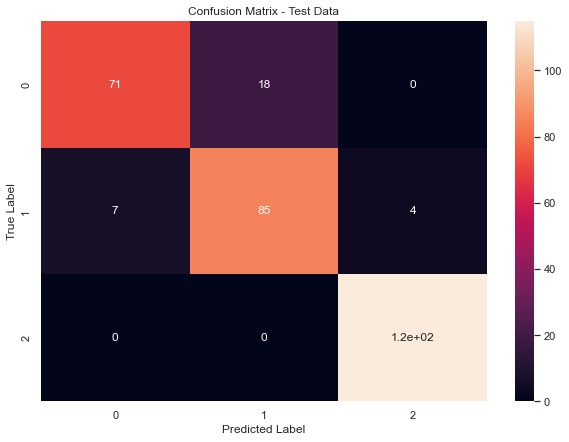

In [20]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [21]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


In [22]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_test_hat, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_test_hat, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_test_hat))
    print("F1 Score : ", f1_score(y_test, y_test_hat, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_test_hat))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Low', 'Medium', 'High'])
    cm.plot()

Precision :  0.9033333333333333
Recall :  0.9033333333333333
Accuracy :  0.9033333333333333
F1 Score :  0.9033333333333333

 [[ 71  18   0]
 [  7  85   4]
 [  0   0 115]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           1       0.91      0.80      0.85        89
           2       0.83      0.89      0.85        96
           3       0.97      1.00      0.98       115

    accuracy                           0.90       300
   macro avg       0.90      0.89      0.90       300
weighted avg       0.90      0.90      0.90       300

******************************************************



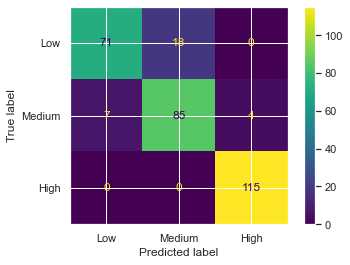

In [23]:
perform(y_test_hat)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           1       0.91      0.80      0.85        89
           2       0.83      0.89      0.85        96
           3       0.97      1.00      0.98       115

    accuracy                           0.90       300
   macro avg       0.90      0.89      0.90       300
weighted avg       0.90      0.90      0.90       300



Accuracy: 0.90
Precision for Class 1: 0.91
Recall for Class 1: 0.80
Precision for Class 2: 0.83
Recall for Class 2: 0.89
Precision for Class 3: 0.97
Recall for Class 3: 1.00


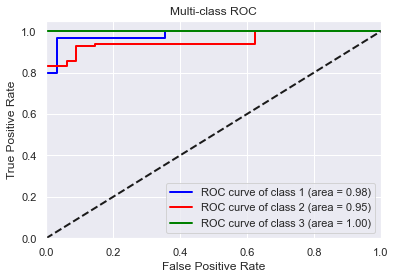

In [34]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_test, y_test_hat are defined, and you have a probability output for each class
y_probas = Classifier.predict_proba(X_test)  # Ensure this gives a probability for each class

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_test_hat)

# Generate a classification report
report = classification_report(y_test, y_test_hat, output_dict=True)

# Print Accuracy
print(f"Accuracy: {accuracy:.2f}")

# Extracting and printing precision and recall for each class
for label in [1, 2, 3]:  # These are your class labels
    precision = report[str(label)]['precision']
    recall = report[str(label)]['recall']
    print(f"Precision for Class {label}: {precision:.2f}")
    print(f"Recall for Class {label}: {recall:.2f}")

# To plot ROC AUC curve for multi-class, you need to binarize the output
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting each class ROC Curve
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i+1} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()


In [36]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score

# Example usage (assuming y_test and y_test_hat are already defined)
report = classification_report(y_test, y_test_hat, output_dict=True)

# Overall metrics
accuracy = accuracy_score(y_test, y_test_hat)  # Overall accuracy
macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']
weighted_precision = report['weighted avg']['precision']
weighted_recall = report['weighted avg']['recall']

# Direct calculation of micro-averaged precision and recall
micro_precision = precision_score(y_test, y_test_hat, average='micro')
micro_recall = recall_score(y_test, y_test_hat, average='micro')

print("Overall Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Macro Precision: {macro_precision:.2f}")
print(f"Macro Recall: {macro_recall:.2f}")
print(f"Weighted Precision: {weighted_precision:.2f}")
print(f"Weighted Recall: {weighted_recall:.2f}")
print(f"Micro Precision (and Recall): {micro_precision:.2f}")


Overall Metrics:
Accuracy: 0.90
Macro Precision: 0.90
Macro Recall: 0.89
Weighted Precision: 0.90
Weighted Recall: 0.90
Micro Precision (and Recall): 0.90


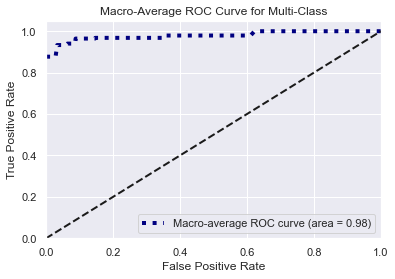

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

# Assume y_test are your true labels and y_probas are the probability predictions from your model
# y_probas should be of shape (n_samples, n_classes)
n_classes = 3  # Number of classes

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC AUC
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

macro_roc_auc = auc(all_fpr, mean_tpr)

# Plot the macro-average ROC curve
plt.figure()
plt.plot(all_fpr, mean_tpr, label='Macro-average ROC curve (area = {0:0.2f})'
               ''.format(macro_roc_auc), color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-Average ROC Curve for Multi-Class')
plt.legend(loc="lower right")
plt.show()


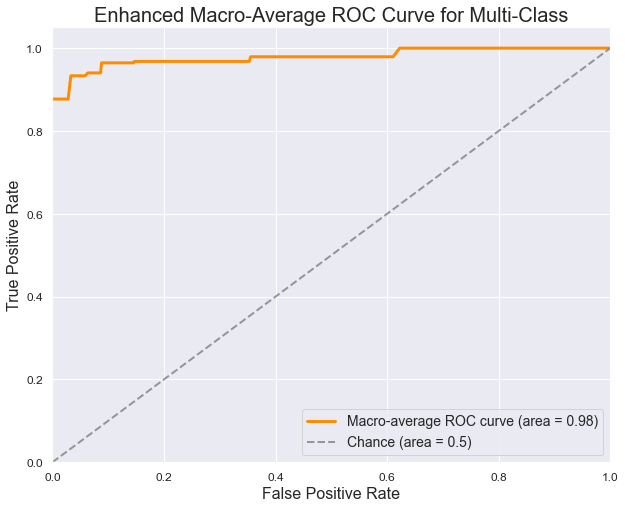

In [38]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Assume y_test are your true labels and y_probas are the probability predictions from your model
# y_probas should be of shape (n_samples, n_classes)
n_classes = 3  # Number of classes

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
macro_roc_auc = auc(all_fpr, mean_tpr)

# Plot the macro-average ROC curve
plt.figure(figsize=(10, 8))  # Set the size of the plot
plt.plot(all_fpr, mean_tpr, color='darkorange', linestyle='-', linewidth=3,
         label=f'Macro-average ROC curve (area = {macro_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='gray', label='Chance (area = 0.5)', alpha=0.8)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Enhanced Macro-Average ROC Curve for Multi-Class', fontsize=20)
plt.legend(loc="lower right", fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


C:\Users\arlos\AppData\Local\Temp\ipykernel_23900\2428002720.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', lw=2, color='gray', alpha=0.8)  # Chance line


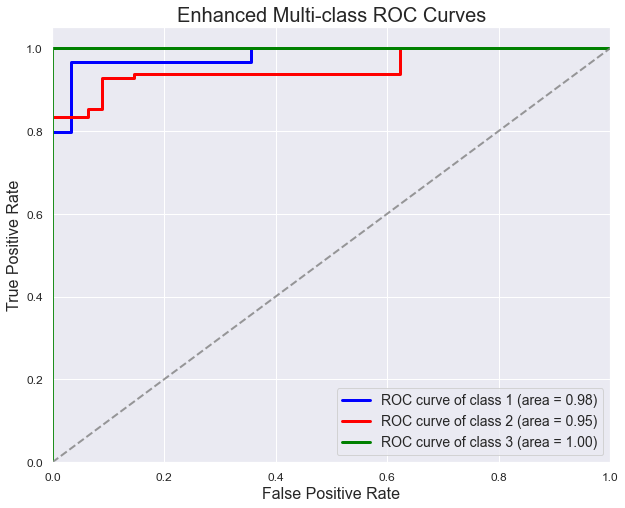

In [41]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Assuming you have y_test, y_test_hat, and y_probas defined correctly
# Here's how you compute and plot the ROC curves with correct indexing:

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting each class ROC Curve
plt.figure(figsize=(10, 8))  # Make the plot larger
colors = cycle(['blue', 'red', 'green'])  # Colors for each class
for i in range(n_classes):  # Use range(n_classes) to correctly index dictionaries
    plt.plot(fpr[i], tpr[i], color=next(colors), lw=3,
             label=f'ROC curve of class {i+1} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, color='gray', alpha=0.8)  # Chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Enhanced Multi-class ROC Curves', fontsize=20)
plt.legend(loc="lower right", fontsize=14)
plt.grid(True)  # Add grid for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
